In [1]:
text = 'You say goodbye and I say hello.'

In [2]:
text = text.lower()

In [3]:
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [4]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [5]:
word_to_id = {}
id_to_word = {}

In [6]:
for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [7]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [8]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [9]:
import numpy as np
corpus = [word_to_id[w] for w in words] # list

In [10]:
isinstance(corpus, list)

True

In [11]:
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [12]:
def preprocess(text):
    # 단어 단위
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    # id 매핑
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    # corpus : dict >> list >> np.array
    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [13]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [14]:
print(corpus)

[0 1 2 3 4 1 5 6]


In [15]:
print(word_to_id)

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [16]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

[0 1 2 3 4 1 5 6]


In [17]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [18]:
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0],
], dtype=np.int32)

In [19]:
print(C[0]) # ID가 0인 단어의 벡터 표현
print(C[4]) # ID가 4인 단어의 벡터 표현

[0 1 0 0 0 0 0]
[0 1 0 0 0 0 1]


In [20]:
print(C[word_to_id['goodbye']]) # "goodbye"의 벡터 표현

[0 1 0 1 0 0 0]


In [21]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    # co_matrix 초기화
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    # 주변 단어 count
    for idx, word_id in enumerate(corpus): # idx : 0~corpus.size-1
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            # corpus 범위 밖으로 나가지 않도록!
            if left_idx >= 0:
                # 1 +count
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [22]:
for idx, word_id in enumerate(corpus):
    print(idx, word_id)

print(corpus.size)

0 0
1 1
2 2
3 3
4 4
5 1
6 5
7 6
8


In [23]:
def cos_similarity(x, y): # x, y -> np.array
    nx = x / np.sqrt(np.sum(x**2)) # x의 정규화
    ny = y / np.sqrt(np.sum(y**2)) # y의 정규화
    return np.dot(nx, ny)

In [24]:
def cos_similarity(x, y, eps=1e-8): # 인수 0으로 나누기 오류 -> epsilon
    nx = x / np.sqrt(np.sum(x**2) + eps) # x의 정규화
    ny = y / np.sqrt(np.sum(y**2) + eps) # y의 정규화
    return np.dot(nx, ny)

In [25]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # you 의 단어 벡터
c1 = C[word_to_id['i']]   # i의 단어 벡터
print(c0, c1)
print(cos_similarity(c0, c1))

[0 1 0 0 0 0 0] [0 1 0 1 0 0 0]
0.7071067691154799


In [26]:
x = np.array([100, -20, 2])
# 오름차순 : 인덱스 반환!
x.argsort()

array([1, 2, 0])

In [27]:
x = np.array([100, -20, 2])
# 내림차순 : (-) 곱한 후 오름차순
(-x).argsort()

array([0, 2, 1])

In [28]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색
    query: 쿼리(텍스트)
    word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    top: 상위 몇 개까지 출력할 지 지정
    '''

    # 1. 검색어query 단어벡터query_vec를 꺼낸다.==========================
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2. query_vec와 코사인 유사도 계산 ==================================
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 3. 코사인 유사도를 기준으로 내림차순으로 출력 =======================
    count = 0
    for i in (-1 * similarity).argsort(): # similarity = vocab index
        if id_to_word[i] == query:        # i == vocab index
            continue                      # 자신 제외
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [29]:
x = np.array([100, -20, 2])
print(x)
print('\n')
for i in (-1 * x).argsort(): # =vocab
    print(i)

[100 -20   2]


0
2
1


In [30]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar

text = 'I\'m too tired to do this..'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size) # vocab_size 만큼 co-matrix 초기화

most_similar('tired', word_to_id, id_to_word, C, top=5)


[query] tired
 i'm: 0.7071067691154799
 do: 0.49999999292893216
 too: 0.0
 to: 0.0
 this: 0.0


In [31]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar

text = 'I am too tired to do this..'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size) # vocab_size 만큼 co-matrix 초기화

most_similar('tired', word_to_id, id_to_word, C, top=5)


[query] tired
 am: 0.49999999292893216
 do: 0.49999999292893216
 i: 0.0
 too: 0.0
 to: 0.0


In [32]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size) # vocab_size 만큼 co-matrix 초기화

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [33]:
import numpy as np
test =  np.random.randn(10, 4)
test.shape

(10, 4)

In [34]:
np.sum(test)

-4.342798124025213

In [35]:
C

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [36]:
np.sum(C)

14

In [37]:
corpus.shape

(8,)

In [38]:
# 동시발생 행렬 >> PPMI 행렬 변환
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float23)
    N = np.sum(C)         # (#1), window 내 등장 1 
    S = np.sum(C, axis=0) # 각 단어 동시발생 횟수
    total = C.shape[0] * C.shape[1]  # shape : (voc_size, voc_size)
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose: # 진행상황
                cnt += 1
                if cnt % (total//100+1) == 0: # 전체 작업의 약 1%(total/100내림 +1)마다
                    print('%.1f%% 완료' % (100*cnt/total)) # 현재까지 완료된 작업의 백분율
        return M

In [39]:
W = ppmi(C, verbose=True)

AttributeError: module 'numpy' has no attribute 'float23'

In [ ]:
total = 270
print(total//100)
print(total//100+1)

total = 25
print(total//100)
print(total//100+1)

2
3
0
1


In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

#W = ppmi(C, verbose=True)
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50) # ---
print('PPMI')
print(W)
print('-'*50)
print(id_to_word.values())

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]
--------------------------------------------------
dict_values(['you', 'say', 'goodbye', 'and', 'i', 'hello', '.'])


In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)
print(W[0], W[0].shape) # sparse vec
print(U[0], U[0].shape) # 밀집 vec

[0.    1.807 0.    0.    0.    0.    0.   ] (7,)
[ 3.409e-01 -1.110e-16 -1.205e-01 -4.163e-16 -9.323e-01 -1.110e-16
 -2.426e-17] (7,)


In [ ]:
# 2차원 벡터로 차원 감소
print(U[0, :2])

[ 3.409e-01 -1.110e-16]


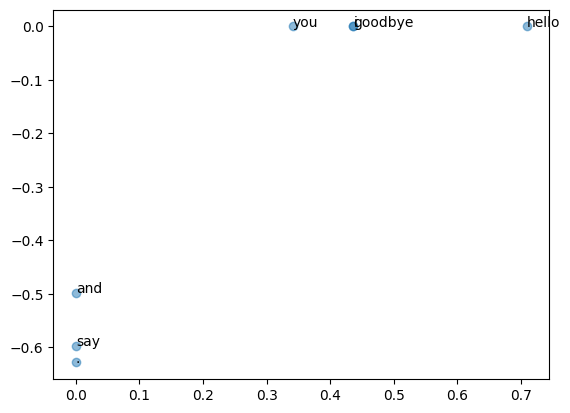

'\nplt.annotate() 함수를 사용하여 각 단어를 해당 단어의 벡터 위치에 주석으로 추가합니다. \n여기서 word는 주석으로 추가할 텍스트이며, (U[word_id, 0], U[word_id, 1])은 주석을 추가할 위치(단어 벡터의 x, y 좌표)입니다.\n\nplt.scatter() 함수를 사용하여 U 행렬의 모든 단어 벡터를 2차원 공간에 점으로 표시합니다. \n여기서 U[:,0]은 모든 단어 벡터의 x 좌표를, U[:,1]은 모든 단어 벡터의 y 좌표를 나타냅니다. alpha=0.5는 점의 투명도를 설정합니다.\n'

In [ ]:
import matplotlib.pyplot as plt
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1])) # 2차원

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

'''
plt.annotate() 함수를 사용하여 각 단어를 해당 단어의 벡터 위치에 주석으로 추가합니다. 
여기서 word는 주석으로 추가할 텍스트이며, (U[word_id, 0], U[word_id, 1])은 주석을 추가할 위치(단어 벡터의 x, y 좌표)입니다.

plt.scatter() 함수를 사용하여 U 행렬의 모든 단어 벡터를 2차원 공간에 점으로 표시합니다. 
여기서 U[:,0]은 모든 단어 벡터의 x 좌표를, U[:,1]은 모든 단어 벡터의 y 좌표를 나타냅니다. alpha=0.5는 점의 투명도를 설정합니다.
'''

In [ ]:
import sys
sys.path.append('..')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train') # 문장 끝에 <eos>
                                                        # 인수로 'train', 'test', 'valid' 중 하나 지정 가능

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:50]) # corpus : 단어 ID 목록 저장
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 27 24 39 26 40 41 42 26 43
 32 44]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100 # PCA

corpus, word_to_id, id_to_word = ptb.load_data('train')

vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)

print('PPMI 계산')
W = ppmi(C, verbose=False)

print('SVD 계산')
try: 
    # truncated SVD 빠르다!!
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)

except ImportError:
    # SVD 느리다!!
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산
SVD 계산
